# Kevin Chandra ( D421 16 311)

## K Nearest Neighbors (KNN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# membuat plot dari data training dan data testing
def plot_data(df_train, test = None):
    
    # menentukan titik x,y dari data train yang memiliki Default "Y"
    x_default_y = np.array(df_train['Age'][df_train['Default']=='Y'], dtype=np.float)
    y_default_y = np.array(df_train['Loan'][df_train['Default']=='Y'], dtype=np.float)

    # menentukan titik x,y dari data train yang memiliki Default "N"
    x_default_n = np.array(df_train['Age'][df_train['Default']=='N'], dtype=np.float)
    y_default_n = np.array(df_train['Loan'][df_train['Default']=='N'], dtype=np.float)

    # memplot data yang diperoleh
    plt.scatter(x_default_y, y_default_y, marker = 'o', c='g', label='Y')
    plt.scatter(x_default_n, y_default_n, marker = 'x', c='r', label='N')
    
    # memeriksa apakah ada data test yang dimasukkan, jika ada maka data test juga diplot
    if(test != None):
        plt.scatter(test[0], test[1], marker = '*', c = 'b', s=200)

    # menampilkan legenda dan grid pada plot
    plt.legend()
    plt.grid(True)

    # menampilkan plot
    plt.show()

In [3]:
# function yang akan menjalankan program algoritma KNN
def knn_classifier(df_train, test, k = 3):
    # mengubah format data train menjadi array
    np_train = np.array(df_train)
    dist = []
    
    # mengitung jarak dari setiap titik pada data train dengan titik data test
    for i in range(np_train.shape[0]):
        dist_count = 0
        data = np_train[i]
        
        # euclidean distance
        for j in range(len(data)-1):
            dist_count += (float(data[j]) - test[j])**2
        
        # menambahkan jarak dan target label ke dalam list
        dist.append([np.sqrt(dist_count), data[2]])
    
    # menampilkan hasil perhitungan jarak beserta target label masing-masing data train
    print_df = pd.DataFrame(data = dist, columns=['Distance To Test Data', 'Default'])
    print(print_df)
    
    # mengurutkan jarak tiap titik dari kecil ke besar
    dist.sort(key=lambda x: x[0])
    
    # mengambil tetangga titik data test sebanyak k data
    neighbors = []
    for i in range(k):
        neighbors.append(dist[i][1])
    
    # mengembalikan nilai target label terbanyak dari k data sebagai predicted label
    return max(set(neighbors), key=neighbors.count)

In [4]:
# menginisialisasi data training
df_train = pd.DataFrame(data = np.array([[25, 40000, 'N'],
                                        [35, 60000, 'N'],
                                        [45, 80000, 'N'],
                                        [20, 20000, 'N'],
                                        [35, 120000, 'N'],
                                        [52, 18000, 'N'],
                                        [23, 95000, 'Y'],
                                        [40, 62000, 'Y'],
                                        [60, 100000, 'Y'],
                                        [48, 220000, 'Y'],
                                        [33, 150000, 'Y']]),
                       columns = ['Age', 'Loan', 'Default'])
df_train

,Age,Loan,Default
0,25,40000,N
1,35,60000,N
2,45,80000,N
3,20,20000,N
4,35,120000,N
5,52,18000,N
6,23,95000,Y
7,40,62000,Y
8,60,100000,Y
9,48,220000,Y


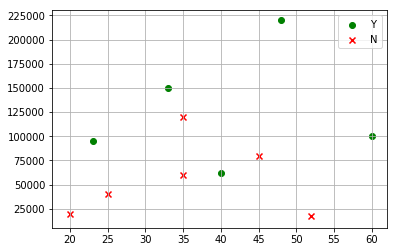

In [5]:
# menampilkan plot dari data training
plot_data(df_train)

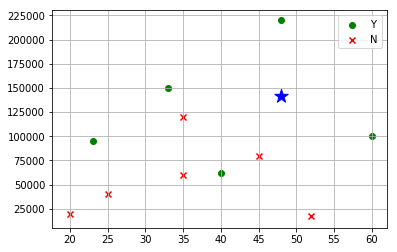

In [6]:
# menginisialisasi dan menampilkan plot dari data testing
test_data = [48, 142000]

plot_data(df_train, test_data)

In [7]:
# menjalankan algoritma KNN dan menampilkan predicted label
print('\nDefault Data Test : ' + '\033[1m' + knn_classifier(df_train, test_data) + '\033[0m')

    Distance To Test Data Default
0           102000.002593       N
1            82000.001030       N
2            62000.000073       N
3           122000.003213       N
4            22000.003841       N
5           124000.000065       N
6            47000.006649       Y
7            80000.000400       Y
8            42000.001714       Y
9            78000.000000       Y
10            8000.014062       Y

Default Data Test : Y


## KNN with Standardized Distance 

In [8]:
# function menstandarisasi data train maupun data test yang akan digunakan
def standardized_data(df_train, test):
    # deklarasi variabel
    dict_train = {}
    test_data = []
    i = 0
    
    # melakukan standarisasi tiap data dengan rumus = x - min / max - min
    for col in df_train.columns[:-1]:
        data = list(np.array(df_train[col], dtype=np.float))
        min_value = min(data)
        max_value = max(data)
        data = [(x-min_value)/(max_value-min_value) for x in data]
        dict_train[col] = data
        
        # melakukan standarisasi untuk data test
        test_data.append((test[i]-min_value)/(max_value-min_value))
        i += 1
    
    # menambahkan label dari tiap data yang telak distandarisasi
    dict_train[df_train.columns[-1]] = df_train[df_train.columns[-1]]
    df_train = pd.DataFrame(dict_train)
    
    # mengembalikan data train dan test yang telah distandarisasi
    return [[df_train], test_data]

In [9]:
# menstandarisasi data train dan data test
[[std_df_train], std_test_data] = standardized_data(df_train, test_data)

In [10]:
# menampilkan data train yang telah distandarisasi
std_df_train

,Age,Loan,Default
0,0.125,0.108911,N
1,0.375,0.207921,N
2,0.625,0.306931,N
3,0.000,0.009901,N
4,0.375,0.504950,N
5,0.800,0.000000,N
6,0.075,0.381188,Y
7,0.500,0.217822,Y
8,1.000,0.405941,Y
9,0.700,1.000000,Y


In [11]:
# menampilkan data test yang telah distandarisasi
std_test_data

[0.7, 0.6138613861386139]

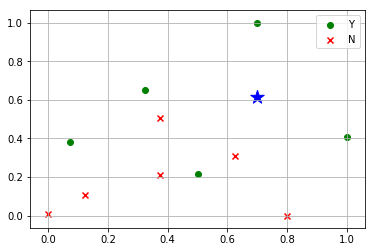

In [12]:
# memplot data train dan data test yang telah distandarisasi
plot_data(std_df_train, std_test_data)

In [13]:
# menjalankan algoritma KNN dan menampilkan predicted label
print('\nDefault Data Test : ' + '\033[1m' + knn_classifier(std_df_train, std_test_data) + '\033[0m')

    Distance To Test Data Default
0                0.765245       N
1                0.520012       N
2                0.315961       N
3                0.924537       N
4                0.342763       N
5                0.621953       N
6                0.666905       Y
7                0.443675       Y
8                0.365008       Y
9                0.386139       Y
10               0.377085       Y

Default Data Test : N
